In [41]:
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
experiment = '../../output/train/cdiff-top250-loo-logcosh/'
label = 'IGKC'

C.diff.A1
train MSE 4.057
test MSE 3.449
train pearson 0.233 (p=5.254185177723057e-79)
test pearson 0.104 (p=0.005602305524969456)

C.diff.B1
train MSE 1.426
test MSE 0.794
train pearson -0.065 (p=1.5800896269027787e-07)
test pearson 0.010 (p=0.8077848697319842)

C.diff.C1
train MSE 5.021
test MSE 3.696
train pearson -0.318 (p=1.79035963182894e-98)
test pearson -0.010 (p=0.5963817288757159)

mean train MSE 3.501 ± 1.519
mean test MSE 2.646 ± 1.314
mean train pearson -0.050 ± 0.225
mean test pearson 0.035 ± 0.050


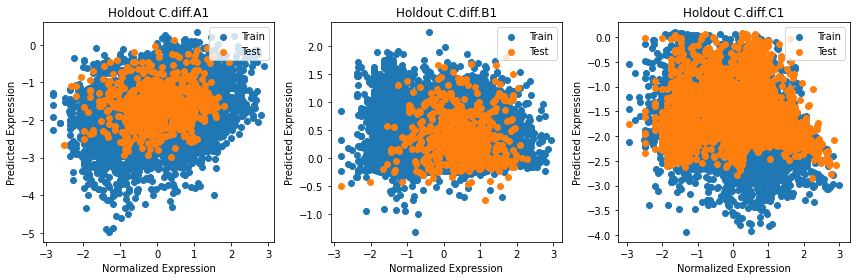

In [44]:
train_mses = []
train_pearsons = []
test_mses = []
test_pearsons = []
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, slide in enumerate(['C.diff']):
    for j, section in enumerate(['A1', 'B1', 'C1', 'D1']):
        trial = f'{slide}.{section}'
        if trial == 'C.diff.D1':
            break
        # ax = axs[i, j]
        ax = axs[j]
        train_true = pd.read_csv(f'{experiment}/{trial}/train.csv')[label]
        train_pred = pd.read_csv(f'{experiment}/{trial}/train_predictions.csv')[label]
        test_true = pd.read_csv(f'{experiment}/{trial}/test.csv')[label]
        test_pred = pd.read_csv(f'{experiment}/{trial}/test_predictions.csv')[label]
        train_mse = mean_squared_error(train_true, train_pred)
        test_mse = mean_squared_error(test_true, test_pred)
        train_pearson, train_p = pearsonr(train_true, train_pred)
        test_pearson, test_p = pearsonr(test_true, test_pred)
        print(trial)
        print(f'train MSE {train_mse:0.3f}')
        print(f'test MSE {test_mse:0.3f}')
        print(f'train pearson {train_pearson:0.3f} (p={train_p})')
        print(f'test pearson {test_pearson:0.3f} (p={test_p})')
        print()
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        train_pearsons.append(train_pearson)
        test_pearsons.append(test_pearson)
        ax.scatter(train_true, train_pred, label=f'Train')
        ax.scatter(test_true, test_pred, label=f'Test')
        ax.set_title(f'Holdout {trial}')
        # ax.set_ylim([-4, 4])
        # ax.set_xlim([-1, 11])
        ax.set_ylabel('Predicted Expression')
        ax.set_xlabel('Normalized Expression')
        ax.legend(loc='upper right')
print(f'mean train MSE {np.mean(train_mses):0.3f} ± {np.std(train_mses):0.3f}')
print(f'mean test MSE {np.mean(test_mses):0.3f} ± {np.std(test_mses):0.3f}')
print(f'mean train pearson {np.mean(train_pearsons):0.3f} ± {np.std(train_pearsons):0.3f}')
print(f'mean test pearson {np.mean(test_pearsons):0.3f} ± {np.std(test_pearsons):0.3f}')
plt.tight_layout()

In [33]:
train_true

0       0.101850
1       0.246438
2       1.551153
3       0.591533
4      -1.008638
          ...   
3596   -0.575393
3597   -0.594839
3598   -1.153824
3599    0.093585
3600    1.361682
Name: IGKC, Length: 3601, dtype: float64

In [34]:
train_pred

0       0.309396
1       0.535587
2       0.618177
3       0.754794
4       0.539266
          ...   
3596    0.514508
3597    0.521620
3598    0.515032
3599    0.534418
3600    0.528359
Name: IGKC, Length: 3601, dtype: float64

C.diff.A1
train MSE 1.245
test MSE 2.021
train pearson 0.080 (p=1.6850251581024062e-10)
test pearson 0.287 (p=5.963266816569728e-15)

C.diff.B1
train MSE 1.387
test MSE 12.086
train pearson 0.027 (p=0.027225429191715663)
test pearson -0.050 (p=0.23510420558629652)

C.diff.C1
train MSE 1.179
test MSE 0.857
train pearson 0.101 (p=6.13750741615981e-11)
test pearson -0.024 (p=0.19327140178134683)

H.pylori.A1
train MSE 2.544
test MSE 1.336
train pearson -0.027 (p=0.031934110559037686)
test pearson -0.258 (p=7.403448078057631e-10)

H.pylori.B1
train MSE 8.880
test MSE 5.959
train pearson -0.066 (p=1.4898186769253226e-07)
test pearson -0.121 (p=0.0006533910710830338)

H.pylori.C1
train MSE 1.626
test MSE 0.461
train pearson 0.192 (p=2.111303354941811e-53)
test pearson 0.282 (p=2.4283169830869963e-15)

H.pylori.D1
train MSE 1.016
test MSE 0.239
train pearson 0.041 (p=0.001245774845179248)
test pearson 0.166 (p=2.107056829091282e-06)

mean train MSE 2.554 ± 2.624
mean test MSE 3.280 ± 4.021
me

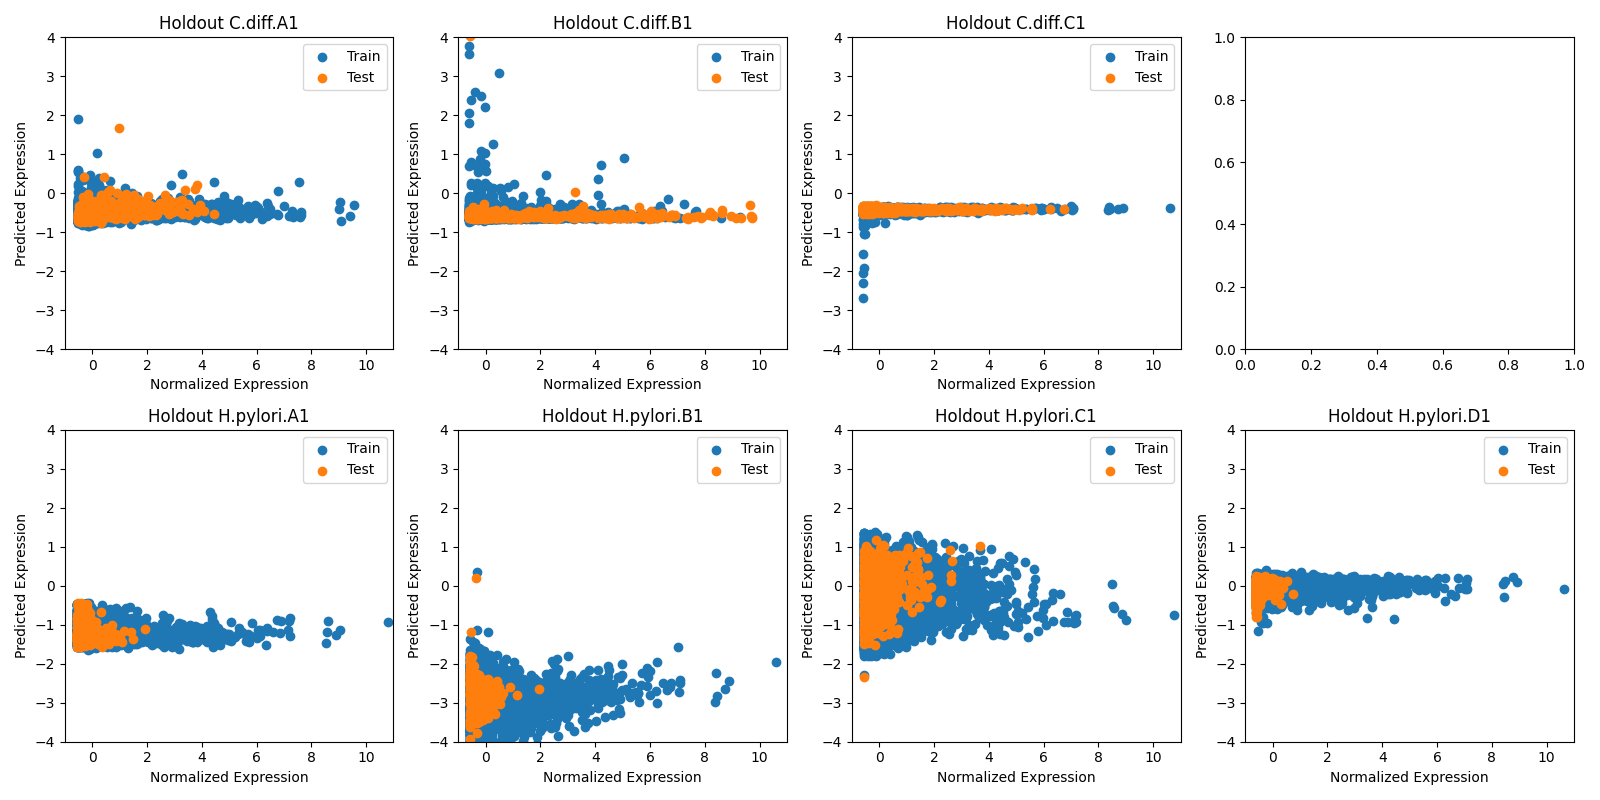

In [32]:
train_mses = []
train_pearsons = []
test_mses = []
test_pearsons = []
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for i, slide in enumerate(['C.diff', 'H.pylori']):
    for j, section in enumerate(['A1', 'B1', 'C1', 'D1']):
        ax = axs[i, j]
        trial = f'{slide}.{section}'
        if trial == 'C.diff.D1':
            continue
        train_true = pd.read_csv(f'{experiment}/{trial}/train.csv')[label]
        train_pred = pd.read_csv(f'{experiment}/{trial}/train_predictions.csv')[label]
        test_true = pd.read_csv(f'{experiment}/{trial}/test.csv')[label]
        test_pred = pd.read_csv(f'{experiment}/{trial}/test_predictions.csv')[label]
        train_mse = mean_squared_error(train_true, train_pred)
        test_mse = mean_squared_error(test_true, test_pred)
        train_pearson, train_p = pearsonr(train_true, train_pred)
        test_pearson, test_p = pearsonr(test_true, test_pred)
        print(trial)
        print(f'train MSE {train_mse:0.3f}')
        print(f'test MSE {test_mse:0.3f}')
        print(f'train pearson {train_pearson:0.3f} (p={train_p})')
        print(f'test pearson {test_pearson:0.3f} (p={test_p})')
        print()
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        train_pearsons.append(train_pearson)
        test_pearsons.append(test_pearson)
        ax.scatter(train_true, train_pred, label=f'Train')
        ax.scatter(test_true, test_pred, label=f'Test')
        ax.set_title(f'Holdout {trial}')
        ax.set_ylim([-4, 4])
        ax.set_xlim([-1, 11])
        ax.set_ylabel('Predicted Expression')
        ax.set_xlabel('Normalized Expression')
        ax.legend(loc='upper right')
print(f'mean train MSE {np.mean(train_mses):0.3f} ± {np.std(train_mses):0.3f}')
print(f'mean test MSE {np.mean(test_mses):0.3f} ± {np.std(test_mses):0.3f}')
print(f'mean train pearson {np.mean(train_pearsons):0.3f} ± {np.std(train_pearsons):0.3f}')
print(f'mean test pearson {np.mean(test_pearsons):0.3f} ± {np.std(test_pearsons):0.3f}')
plt.tight_layout()

In [8]:
train_true

0       0.680785
1       2.490555
2       1.018199
3      -0.392808
4      -0.362134
          ...   
3441   -0.484830
3442   -0.484830
3443   -0.484830
3444    0.036629
3445   -0.454156
Name: EPCAM, Length: 3446, dtype: float64